# Prerequisite executions for code

In [ ]:
!pip install pycountry
!pip install langdetect
!pip install better_profanity
!pip install kora

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 59 kB 6.7 MB/s 


# Imports

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
  
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from better_profanity import profanity

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Twitter scraper

## API initialization

In [ ]:
consumer_key = 'V560JrQMFmViSS6anmDI5XY5K'
consumer_secret = "dnV4avXiQ05Vs3tEictPkt5TJ7E78yoNj0uCwNOm3O6u9fHsrg"
access_token = "1254361766957649925-Q6iFxOGs7wUJHzETOBk9rmT8rEr8w9"
access_token_secret =  "ebaAjVvh5dQIzOOqY3GLnxkRxzQGN36Db0na2BeREJFvA"

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
tweepy.API()

## Helper functions and methods for tweet searching

In [ ]:
from datetime import datetime, timedelta
today = datetime. today()
yesterday = today - timedelta(days=1)
one_week_ago = today - timedelta(days=7)
thirty_days_ago = today - timedelta(days=30)
format = thirty_days_ago.strftime("%Y%m%d%H%m")
format

'202204132004'

In [ ]:
str(thirty_days_ago).split(" ")[0]

'2022-04-13'

In [ ]:
def comb(hashtags, place):
    return hashtags + [place]

In [1]:
def ludicrous(hashtag1, place):
  from nltk import ngrams
  from itertools import permutations

  keywords = []

  hashtag1.append(place)
  for perm in permutations(hashtag1):
    print(perm)
    for i in range(3, len(perm)+1):
      keygrams = ngrams(perm, i)
      for key in keygrams:
        ngr = " ".join(key)
        if ngr not in keywords:
          keywords += [ngr]
  
  return keywords

In [2]:
len(ludicrous(["butter", "milk", "farming"], "ireland"))

('butter', 'milk', 'farming', 'ireland')
('butter', 'milk', 'ireland', 'farming')
('butter', 'farming', 'milk', 'ireland')
('butter', 'farming', 'ireland', 'milk')
('butter', 'ireland', 'milk', 'farming')
('butter', 'ireland', 'farming', 'milk')
('milk', 'butter', 'farming', 'ireland')
('milk', 'butter', 'ireland', 'farming')
('milk', 'farming', 'butter', 'ireland')
('milk', 'farming', 'ireland', 'butter')
('milk', 'ireland', 'butter', 'farming')
('milk', 'ireland', 'farming', 'butter')
('farming', 'butter', 'milk', 'ireland')
('farming', 'butter', 'ireland', 'milk')
('farming', 'milk', 'butter', 'ireland')
('farming', 'milk', 'ireland', 'butter')
('farming', 'ireland', 'butter', 'milk')
('farming', 'ireland', 'milk', 'butter')
('ireland', 'butter', 'milk', 'farming')
('ireland', 'butter', 'farming', 'milk')
('ireland', 'milk', 'butter', 'farming')
('ireland', 'milk', 'farming', 'butter')
('ireland', 'farming', 'butter', 'milk')
('ireland', 'farming', 'milk', 'butter')


48

In [3]:
def plaid(hashtag2, place):
    from nltk import ngrams
    from itertools import permutations

    keywords = []

    for word in hashtag2:
      keywords.append(word)

    hashtag2 += [place]

    for perm in permutations(hashtag2):
        for i in range(2, len(perm)+1):
            keygrams = ngrams(perm, i)
            for key in keygrams:
                ngr = " ".join(key)
                if ngr not in keywords:
                    keywords.append(ngr)
  
    return keywords

In [4]:
len(plaid(["butter", "milk", "farming"], "ireland"))

63

In [6]:
tags = plaid(["butter", "milk", "farming"], "ireland")

In [ ]:
ludicrous(["butter", "milk", "farming"], "ireland")

('butter', 'milk', 'farming', 'ireland')
('butter', 'milk', 'ireland', 'farming')
('butter', 'farming', 'milk', 'ireland')
('butter', 'farming', 'ireland', 'milk')
('butter', 'ireland', 'milk', 'farming')
('butter', 'ireland', 'farming', 'milk')
('milk', 'butter', 'farming', 'ireland')
('milk', 'butter', 'ireland', 'farming')
('milk', 'farming', 'butter', 'ireland')
('milk', 'farming', 'ireland', 'butter')
('milk', 'ireland', 'butter', 'farming')
('milk', 'ireland', 'farming', 'butter')
('farming', 'butter', 'milk', 'ireland')
('farming', 'butter', 'ireland', 'milk')
('farming', 'milk', 'butter', 'ireland')
('farming', 'milk', 'ireland', 'butter')
('farming', 'ireland', 'butter', 'milk')
('farming', 'ireland', 'milk', 'butter')
('ireland', 'butter', 'milk', 'farming')
('ireland', 'butter', 'farming', 'milk')
('ireland', 'milk', 'butter', 'farming')
('ireland', 'milk', 'farming', 'butter')
('ireland', 'farming', 'butter', 'milk')
('ireland', 'farming', 'milk', 'butter')


['butter milk farming',
 'milk farming ireland',
 'butter milk farming ireland',
 'butter milk ireland',
 'milk ireland farming',
 'butter milk ireland farming',
 'butter farming milk',
 'farming milk ireland',
 'butter farming milk ireland',
 'butter farming ireland',
 'farming ireland milk',
 'butter farming ireland milk',
 'butter ireland milk',
 'ireland milk farming',
 'butter ireland milk farming',
 'butter ireland farming',
 'ireland farming milk',
 'butter ireland farming milk',
 'milk butter farming',
 'milk butter farming ireland',
 'milk butter ireland',
 'milk butter ireland farming',
 'milk farming butter',
 'farming butter ireland',
 'milk farming butter ireland',
 'farming ireland butter',
 'milk farming ireland butter',
 'milk ireland butter',
 'ireland butter farming',
 'milk ireland butter farming',
 'ireland farming butter',
 'milk ireland farming butter',
 'farming butter milk',
 'farming butter milk ireland',
 'farming butter ireland milk',
 'farming milk butter',


In [ ]:
len(negative_list)

1459

In [ ]:
len(positive_list)

2462

In [ ]:
from datetime import datetime, timedelta
today = datetime. today()
two_weeks_ago = today - timedelta(days=15)
four_weeks_ago = today - timedelta(weeks=4)
format30 = thirty_days_ago.strftime("%Y%m%d%H%m")
format15 = two_weeks_ago.strftime("%Y%m%d%H%m")

In [ ]:
tweet_list = []

## Twitter scrapers

### Last 30 days

In [ ]:
import time

for gram in tags:
  try:
    # call twitter api to fetch tweets
    fetched_tweets = api.search_30_day(environment_name="dairy30", query=gram, maxResults = 100, fromDate=format15)
  
    # parsing tweets one by one
    for tweet in fetched_tweets:
  
      # empty dictionary to store required params of a tweet
      parsed_tweet = {}
      parsed_tweet["created_at"] = tweet.created_at
  
      # saving text of tweet
      parsed_tweet['text'] = tweet.text

      parsed_tweet["coord"] = tweet.coordinates
      parsed_tweet["place"] = tweet.place

      parsed_tweet["entities"] = tweet.entities
  
      # appending parsed tweet to tweets list
      if tweet.retweet_count > 0:
        # if tweet has retweets, ensure that it is appended only once
        if parsed_tweet not in tweet_list:
            tweet_list.append(parsed_tweet)
      else:
          tweet_list.append(parsed_tweet)
  
  except tweepy.TweepError as e:
    # print error (if any)
    print("Error : " + str(e))
    time.sleep(60)

Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:25:06+00:00', 'transactionId': 'cd59c0381d7f7fdc'}
Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:26:14+00:00', 'transactionId': 'f83d323e6b513b3d'}


### Historic data

In [ ]:
import time

for gram in tags:
  try:
    # call twitter api to fetch tweets
    fetched_tweets = api.search_30_day(environment_name="dairy30", query=gram, maxResults = 100, fromDate=format30, toDate=format15)
  
    # parsing tweets one by one
    for tweet in fetched_tweets:
  
      # empty dictionary to store required params of a tweet
      parsed_tweet = {}
      parsed_tweet["created_at"] = tweet.created_at
  
      # saving text of tweet
      parsed_tweet['text'] = tweet.text

      parsed_tweet["coord"] = tweet.coordinates
      parsed_tweet["place"] = tweet.place

      parsed_tweet["entities"] = tweet.entities
  
      # appending parsed tweet to tweets list
      if tweet.retweet_count > 0:
        # if tweet has retweets, ensure that it is appended only once
        if parsed_tweet not in tweet_list:
            tweet_list.append(parsed_tweet)
      else:
          tweet_list.append(parsed_tweet)
  
  except tweepy.TweepError as e:
    # print error (if any)
    print("Error : " + str(e))
    time.sleep(60)

Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:27:23+00:00', 'transactionId': '4050c64ef3e2a6fc'}
Error : {'message': 'Exceeded rate limit', 'sent': '2022-05-14T09:28:30+00:00', 'transactionId': '2c4291fdc2c51a9d'}


In [ ]:
len(tweet_list)

5124

In [ ]:
tweet_list[2000]

{'coord': None,
 'created_at': datetime.datetime(2022, 5, 11, 8, 56, 9),
 'entities': {'hashtags': [{'indices': [0, 5], 'text': 'Agri'},
   {'indices': [6, 14], 'text': 'Farming'},
   {'indices': [15, 22], 'text': 'farmer'},
   {'indices': [23, 32], 'text': 'farmlife'},
   {'indices': [33, 41], 'text': 'village'},
   {'indices': [42, 51], 'text': 'Pakistan'},
   {'indices': [52, 62], 'text': 'dairyfarm'},
   {'indices': [63, 69], 'text': 'Dairy'},
   {'indices': [70, 75], 'text': 'milk'},
   {'indices': [76, 86], 'text': 'livestock'},
   {'indices': [87, 91], 'text': 'Cow'},
   {'indices': [92, 99], 'text': 'Silage'},
   {'indices': [100, 108], 'text': 'milking'}],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1524312393693683714',
    'indices': [110, 133],
    'url': 'https://t.co/4klwB4PdLq'}],
  'user_mentions': []},
 'place': None,
 'text': '#Agri #Farming #farmer #farmlife #village #Pakistan #dairy

# Processing data

## Assuming data is being worked directly from scraping as above

### Create dataframe from API read

In [7]:
df = pd.DataFrame(columns=["text", "coord", "place", "hashtags"])
for tweet in tweet_list:
  hashtag_tweet = [a["text"] for a in tweet["entities"]["hashtags"]]
  new_row = pd.DataFrame([[tweet["text"], tweet["coord"], tweet["place"], hashtag_tweet]],columns=["text", "coord", "place", "hashtags"])
  df = pd.concat([df,new_row])

NameError: ignored

In [ ]:
df = df.reset_index().drop("index", axis=1)

### Filter out extra Twitter-specific items (\#, Retweet signifier etc.)

In [ ]:
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)

df["formatted_text"] = [rt(remove_rt(a)) for a in df["text"]]

In [ ]:
df["formatted_text"]

0                   Are they still trying to milk this   
1          Caramel bread toast with rose milk            
2        Well happy naman ako sa performance nila  Hin...
3        A child with bread and milk  Istanbul  Turkey...
4        A big gas guzzling SUV is fine if you need to...
                              ...                        
5119     This is significant  Irish dairy co op Lakela...
5120     There is a lot of debate on Twitter today abo...
5121    Buy a Cadbury Dairy Milk in participating SPAR...
5122          Much of the research on N fertiliser and...
5123     Subscriber only  Justin McCarthy   Did the fa...
Name: formatted_text, Length: 5124, dtype: object

### Sentiment analyzer

In [ ]:
negs = []
poss = []
neus = []
coms = []
df["sentiment"] = [""]*len(df["text"])
for index, row in df.iterrows():
  tweet = row["formatted_text"]
  analysis = TextBlob(tweet)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    

  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    df.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    df.loc[index, 'sentiment'] = "positive"
  else:
    df.loc[index, 'sentiment'] = "neutral"
  df.loc[index, 'neg'] = neg
  df.loc[index, 'neu'] = neu
  df.loc[index, 'pos'] = pos
  df.loc[index, 'compound'] = comp

In [ ]:
df

,text,coord,place,hashtags,formatted_text,sentiment,neg,neu,pos,compound
0,Are they still trying to milk this😂 https://t....,None,None,NaN,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000
1,Caramel bread toast with rose milk 🤤🤤🤤❤️❤️❤️❤️,None,None,NaN,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000
2,RT @lilyganados: Well happy naman ako sa perfo...,None,None,NaN,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003
3,RT @historydefined: A child with bread and mil...,None,None,NaN,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000
4,RT @StuInNorway: A big gas-guzzling SUV is fin...,None,None,NaN,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027
...,...,...,...,...,...,...,...,...,...,...
5119,RT @LorcanAllen: This is significant. Irish da...,None,None,NaN,This is significant Irish dairy co op Lakela...,positive,0.0,0.913,0.087,0.2023
5120,RT @JijayShen: There is a lot of debate on Twi...,None,None,NaN,There is a lot of debate on Twitter today abo...,neutral,0.0,1.000,0.000,0.0000
5121,Buy a Cadbury Dairy Milk in participating SPAR...,None,None,NaN,Buy a Cadbury Dairy Milk in participating SPAR...,neutral,0.0,1.000,0.000,0.0000
5122,@ZwartblesIE @StuartMMeikle @eoinmadden Much o...,None,None,NaN,Much of the research on N fertiliser and...,neutral,0.0,1.000,0.000,0.0000


In [ ]:
df["sentiment"].value_counts()

positive    2334
neutral     1884
negative     906
Name: sentiment, dtype: int64

In [ ]:
df["neg"].value_counts()

0.000    3923
0.160     112
0.126      82
0.099      78
0.167      56
         ... 
0.278       1
0.307       1
0.244       1
0.195       1
0.197       1
Name: neg, Length: 174, dtype: int64

### Censor profanity in the tweets

In [ ]:
df_censored = df

In [ ]:
profanity.load_censor_words()


In [ ]:
df_censored["formatted_text"] = [profanity.censor(a) for a in df_censored["formatted_text"]]

In [ ]:
df_censored

,text,coord,place,hashtags,formatted_text,sentiment,neg,neu,pos,compound
0,Are they still trying to milk this😂 https://t....,None,None,nan,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000
1,Caramel bread toast with rose milk 🤤🤤🤤❤️❤️❤️❤️,None,None,nan,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000
2,RT @lilyganados: Well happy naman ako sa perfo...,None,None,nan,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003
3,RT @historydefined: A child with bread and mil...,None,None,nan,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000
4,RT @StuInNorway: A big gas-guzzling SUV is fin...,None,None,nan,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027
...,...,...,...,...,...,...,...,...,...,...
5119,RT @LorcanAllen: This is significant. Irish da...,None,None,nan,This is significant Irish dairy co op Lakela...,positive,0.0,0.913,0.087,0.2023
5120,RT @JijayShen: There is a lot of debate on Twi...,None,None,nan,There is a lot of debate on Twitter today abo...,neutral,0.0,1.000,0.000,0.0000
5121,Buy a Cadbury Dairy Milk in participating SPAR...,None,None,nan,Buy a Cadbury Dairy Milk in participating SPAR...,neutral,0.0,1.000,0.000,0.0000
5122,@ZwartblesIE @StuartMMeikle @eoinmadden Much o...,None,None,nan,Much of the research on N fertiliser and...,neutral,0.0,1.000,0.000,0.0000


### Create WordCloud from syhstem

In [ ]:
import os
path = os.getcwd()

cwd = os.path.abspath(os.path.join(path, os.pardir))

In [ ]:
cwd 

'/Images/'

In [ ]:
def create_wordcloud(data, text):
 mask = np.array(Image.open(cwd+"Images/cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white", mask = mask, max_words=30000, stopwords=stopwords, repeat=True)
 wc.generate(str(data))
 path = cwd+"Images/"+text+"_wordcloud.png"
 wc.to_file(cwd+"Images/"+text+"_wordcloud.png")
 display(Image.open(path))

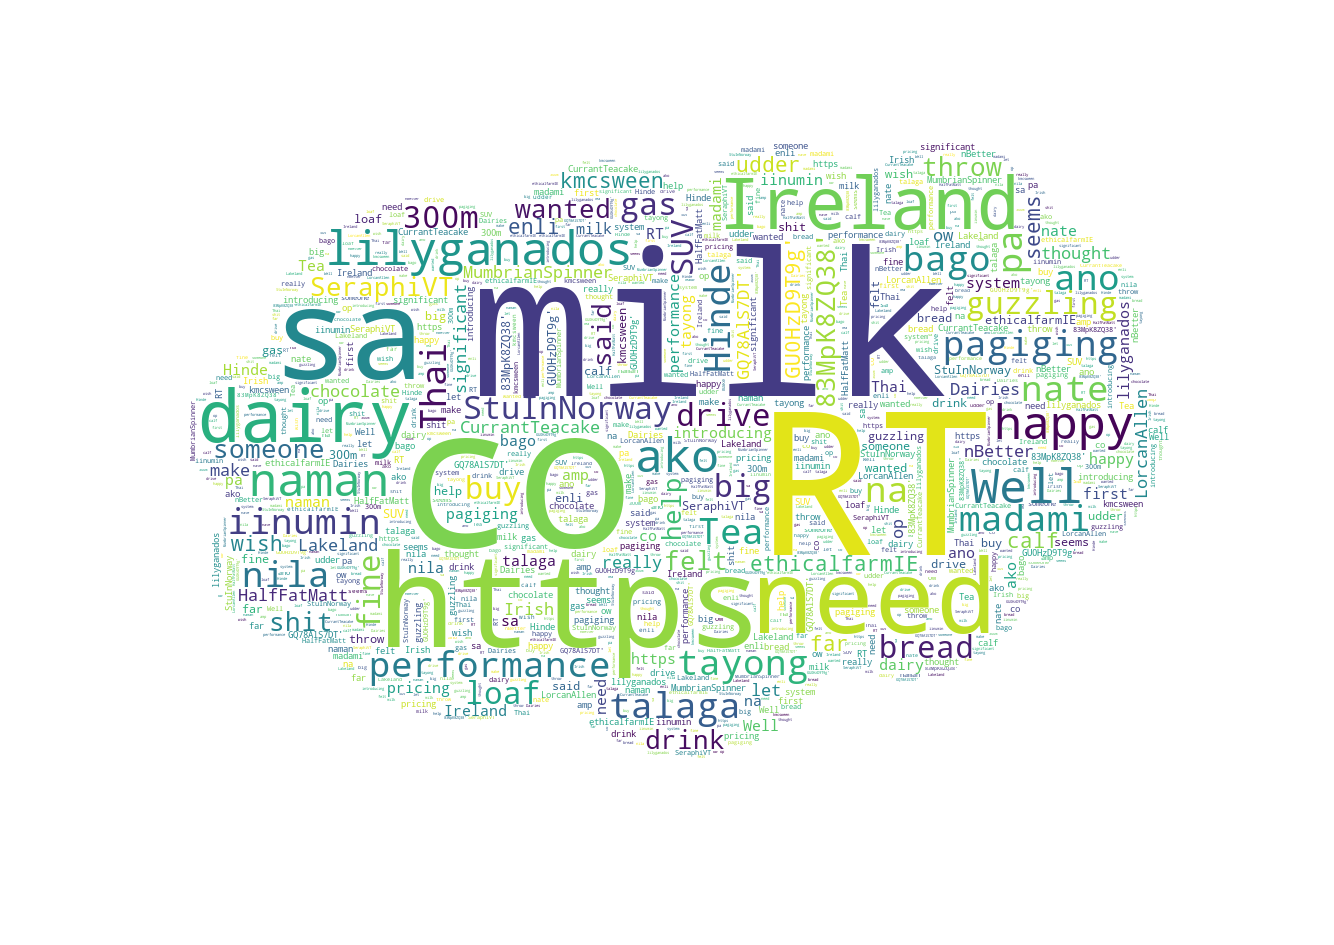

In [ ]:
create_wordcloud(df_censored[df_censored["sentiment"]=="positive"]["text"].values, "positive_tweets")

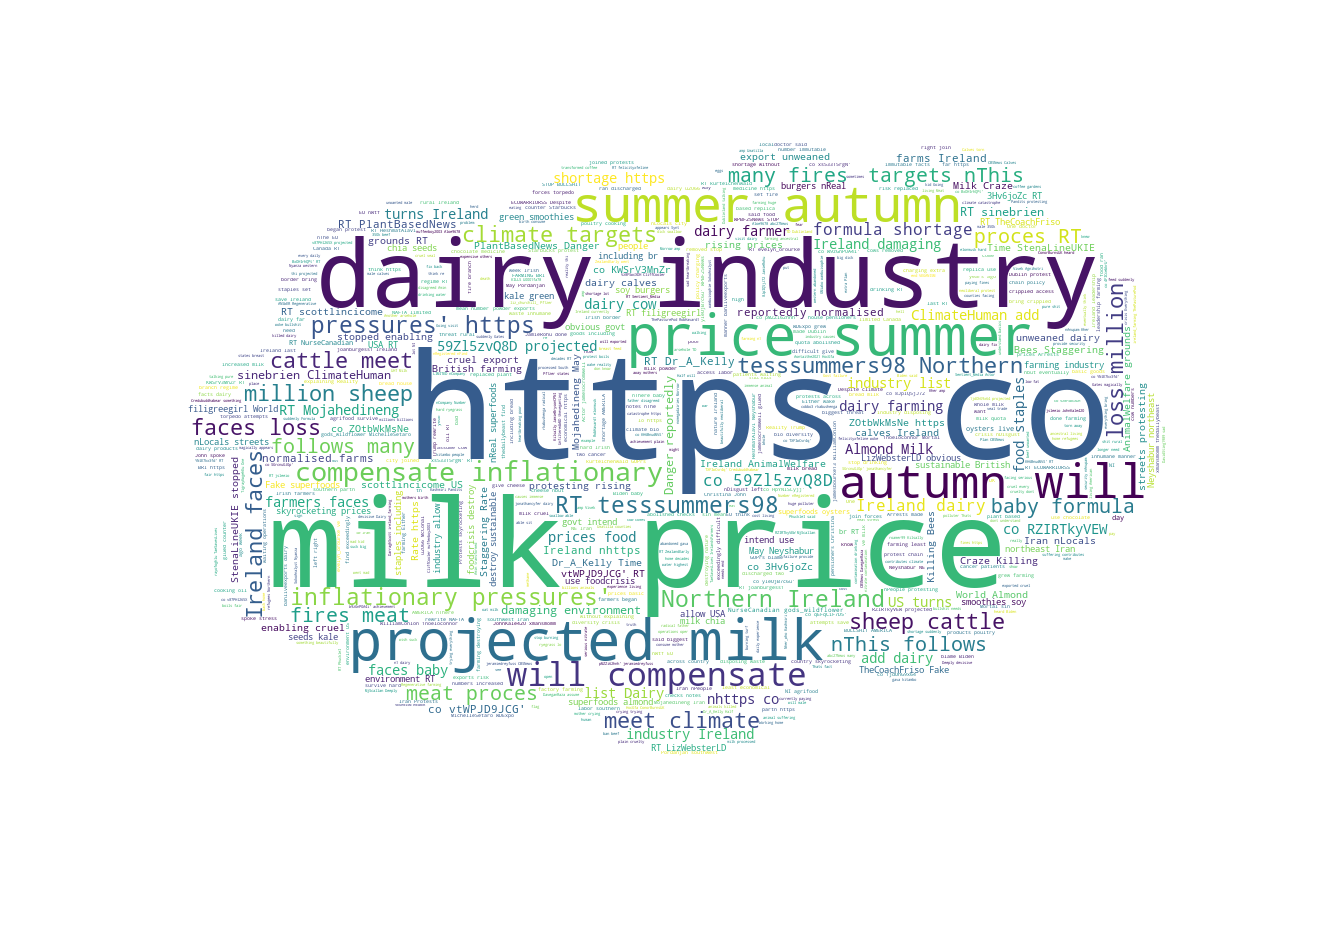

In [ ]:
create_wordcloud(df_censored[df_censored["sentiment"]=="negative"]["text"].values, "negative_tweets")

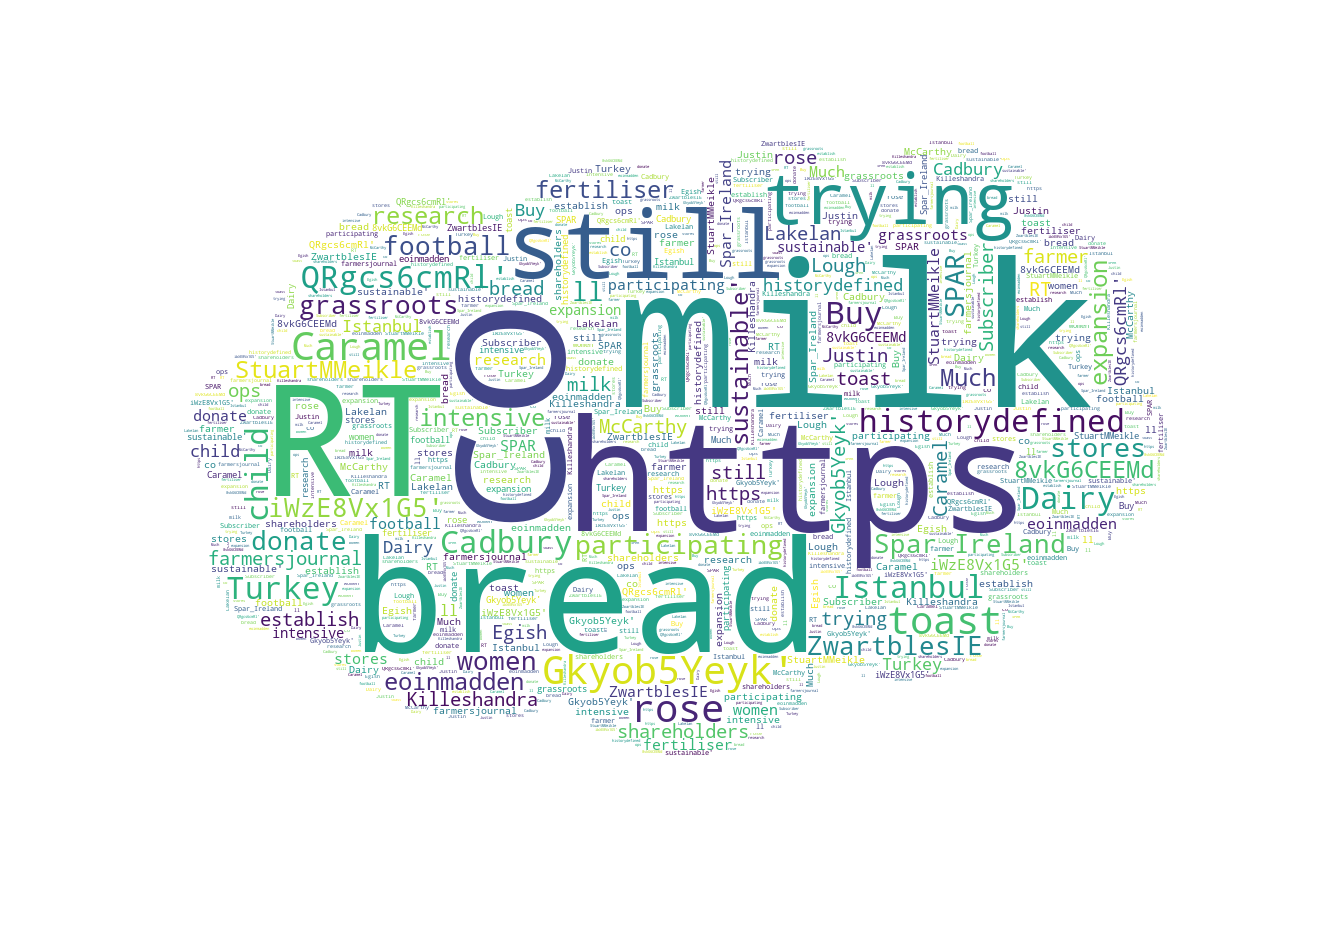

In [ ]:
create_wordcloud(df_censored[df_censored["sentiment"]=="neutral"]["text"].values, "neutral_tweets")

### Further processing functions

In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub("[0–9]+", "", text)
 return text

df_censored["punct"] = df_censored["formatted_text"].apply(lambda x: remove_punct(x))

#Appliyng tokenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

df_censored['tokenized'] = df_censored['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_censored['nonstop'] = df_censored['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_censored['stemmed'] = df_censored['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df_censored.head()

,text,coord,place,hashtags,formatted_text,sentiment,neg,neu,pos,compound,punct,tokenized,nonstop,stemmed
0,Are they still trying to milk this😂 https://t....,None,None,nan,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000,Are they still trying to milk this,"[are, they, still, trying, to, milk, this, ]","[still, trying, milk, ]","[still, tri, milk, ]"
1,Caramel bread toast with rose milk 🤤🤤🤤❤️❤️❤️❤️,None,None,nan,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000,Caramel bread toast with rose milk,"[caramel, bread, toast, with, rose, milk, ]","[caramel, bread, toast, rose, milk, ]","[caramel, bread, toast, rose, milk, ]"
2,RT @lilyganados: Well happy naman ako sa perfo...,None,None,nan,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003,Well happy naman ako sa performance nila Hin...,"[, well, happy, naman, ako, sa, performance, n...","[, well, happy, naman, ako, sa, performance, n...","[, well, happi, naman, ako, sa, perform, nila,..."
3,RT @historydefined: A child with bread and mil...,None,None,nan,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000,A child with bread and milk Istanbul Turkey...,"[, a, child, with, bread, and, milk, istanbul,...","[, child, bread, milk, istanbul, turkey, 18, ]","[, child, bread, milk, istanbul, turkey, 18, ]"
4,RT @StuInNorway: A big gas-guzzling SUV is fin...,None,None,nan,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027,A big gas guzzling SUV is fine if you need to...,"[, a, big, gas, guzzling, suv, is, fine, if, y...","[, big, gas, guzzling, suv, fine, need, drive,...","[, big, ga, guzzl, suv, fine, need, drive, 3m,..."


### N-gram analyzer

In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(,(2,2),20)
n2_bigrams

[('dairy farming', 336),
 ('milk production', 293),
 ('march 2022', 248),
 ('dairy milk', 240),
 ('northern ireland', 240),
 ('farming milk', 233),
 ('production like', 222),
 ('like retweet', 222),
 ('goat farming', 218),
 ('dairy goat', 216),
 ('agricultural input', 205),
 ('input price', 205),
 ('price index', 205),
 ('index shows', 205),
 ('shows fertiliser', 205),
 ('fertiliser prices', 205),
 ('prices 149', 205),
 ('149 year', 205),
 ('year march', 205),
 ('2022 csoir', 204)]

In [ ]:
n3_trigrams = get_top_n_gram(df_censored["formatted_text"],(3,3),20)
n3_trigrams

[('farming milk production', 226),
 ('production like retweet', 222),
 ('milk production like', 220),
 ('dairy goat farming', 216),
 ('goat farming milk', 216),
 ('agricultural input price', 205),
 ('input price index', 205),
 ('price index shows', 205),
 ('index shows fertiliser', 205),
 ('shows fertiliser prices', 205),
 ('fertiliser prices 149', 205),
 ('prices 149 year', 205),
 ('149 year march', 205),
 ('year march 2022', 205),
 ('march 2022 csoir', 204),
 ('good morning cruelty', 166),
 ('morning cruelty free', 166),
 ('cruelty free day', 166),
 ('free day vegan', 166),
 ('day vegan environment', 166)]

## Assuming data was saved from previous Twitter scrape as CSV

In [ ]:
#Red pill or blue pill

from google.colab import drive
from kora import drive as drives
import os

is_drive = False
cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"

while True:
  offon = input("Is this being run offline? (Y = offline (i.e. Jupyter notebook), N = online (i.e. Google Colab notebook)): ")
  try:
    if offon.lower() not in ["y", "n"]:
      raise ValueError
    else:
      if offon.lower() == "n":
        drive.mount('/content/drive')
        is_drive = True
        cwd = str(drives.chdir_notebook())
        cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"
      break
  except ValueError:
    print("Error! Please only type one of the following: Y, y, N, n")

In [ ]:
df_censored.to_csv(cwd+"Datasets/sentiment_analysis_complete.csv")

In [ ]:
df_censored = pd.read_csv(cwd+"sentiment_analysis.csv")

### Remove URLs from tweets

In [ ]:
import re

df_censored["formatted_text"] = [re.sub(r'http\S+', '', x) for x in df_censored["formatted_text"]]

In [ ]:
df_censored

,Unnamed: 0,text,coord,place,hashtags,formatted_text,sentiment,neg,neu,pos,compound
0,0,Are they still trying to milk this😂 https://t....,NaN,NaN,NaN,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000
1,1,Caramel bread toast with rose milk 🤤🤤🤤❤️❤️❤️❤️,NaN,NaN,NaN,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000
2,2,RT @lilyganados: Well happy naman ako sa perfo...,NaN,NaN,NaN,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003
3,3,RT @historydefined: A child with bread and mil...,NaN,NaN,NaN,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000
4,4,RT @StuInNorway: A big gas-guzzling SUV is fin...,NaN,NaN,NaN,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027
...,...,...,...,...,...,...,...,...,...,...,...
5119,5119,RT @LorcanAllen: This is significant. Irish da...,NaN,NaN,NaN,This is significant Irish dairy co op Lakela...,positive,0.0,0.913,0.087,0.2023
5120,5120,RT @JijayShen: There is a lot of debate on Twi...,NaN,NaN,NaN,There is a lot of debate on Twitter today abo...,neutral,0.0,1.000,0.000,0.0000
5121,5121,Buy a Cadbury Dairy Milk in participating SPAR...,NaN,NaN,NaN,Buy a Cadbury Dairy Milk in participating SPAR...,neutral,0.0,1.000,0.000,0.0000
5122,5122,@ZwartblesIE @StuartMMeikle @eoinmadden Much o...,NaN,NaN,NaN,Much of the research on N fertiliser and...,neutral,0.0,1.000,0.000,0.0000


### Create new dataset from formatted text

In [ ]:
df_formatted = pd.DataFrame({"formatted_text": df_censored["formatted_text"]})

In [ ]:
df_formatted

,formatted_text
0,Are they still trying to milk this
1,Caramel bread toast with rose milk
2,Well happy naman ako sa performance nila Hin...
3,A child with bread and milk Istanbul Turkey...
4,A big gas guzzling SUV is fine if you need to...
...,...
5119,This is significant Irish dairy co op Lakela...
5120,There is a lot of debate on Twitter today abo...
5121,Buy a Cadbury Dairy Milk in participating SPAR...
5122,Much of the research on N fertiliser and...


### Sentiment analyzer

In [ ]:
negs = []
poss = []
neus = []
coms = []
df_formatted["sentiment"] = [""]*len(df_formatted["formatted_text"])
for index, row in df_formatted.iterrows():
  tweet = row["formatted_text"]
  analysis = TextBlob(tweet)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    

  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    df_formatted.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    df_formatted.loc[index, 'sentiment'] = "positive"
  else:
    df_formatted.loc[index, 'sentiment'] = "neutral"
  df_formatted.loc[index, 'neg'] = neg
  df_formatted.loc[index, 'neu'] = neu
  df_formatted.loc[index, 'pos'] = pos
  df_formatted.loc[index, 'compound'] = comp

In [ ]:
df_formatted

,formatted_text,sentiment,neg,neu,pos,compound
0,Are they still trying to milk this,neutral,0.0,1.000,0.000,0.0000
1,Caramel bread toast with rose milk,neutral,0.0,1.000,0.000,0.0000
2,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003
3,A child with bread and milk Istanbul Turkey...,neutral,0.0,1.000,0.000,0.0000
4,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027
...,...,...,...,...,...,...
5119,This is significant Irish dairy co op Lakela...,positive,0.0,0.913,0.087,0.2023
5120,There is a lot of debate on Twitter today abo...,neutral,0.0,1.000,0.000,0.0000
5121,Buy a Cadbury Dairy Milk in participating SPAR...,neutral,0.0,1.000,0.000,0.0000
5122,Much of the research on N fertiliser and...,neutral,0.0,1.000,0.000,0.0000


In [ ]:
df_formatted["sentiment"].value_counts()

positive    2349
neutral     1896
negative     879
Name: sentiment, dtype: int64

In [ ]:
df_formatted["sentiment"].value_counts() / df_formatted["sentiment"].count()

positive    0.458431
neutral     0.370023
negative    0.171546
Name: sentiment, dtype: float64

In [ ]:
df_formatted[df_formatted["sentiment"] == "positive"]

,formatted_text,sentiment,neg,neu,pos,compound
2,Well happy naman ako sa performance nila Hin...,positive,0.0,0.775,0.225,0.7003
4,A big gas guzzling SUV is fine if you need to...,positive,0.0,0.947,0.053,0.1027
7,I once felt like **** and wanted to throw up...,positive,0.0,0.785,0.215,0.6369
8,They are so adorable I love my strawberries ...,positive,0.0,0.677,0.323,0.8623
11,100 premium quality amp handmade cow milk g...,positive,0.0,0.849,0.151,0.5499
...,...,...,...,...,...,...
5114,Become a Supporter amp a Half of women s fo...,positive,0.0,0.877,0.123,0.2732
5116,Lakeland Dairies have a year round continuous ...,positive,0.0,0.874,0.126,0.3182
5117,I wish we had dairy with calf at udder mil...,positive,0.0,0.870,0.130,0.4019
5118,I thought the chocolate really let this ...,positive,0.0,0.791,0.209,0.4404


In [ ]:
df_formatted["pos"].sum()

642.359

In [ ]:
df_formatted["neg"].sum()

217.31599999999997

In [ ]:
df_formatted["neu"].sum()

4216.323

### WordCloud generator

In [ ]:
def create_wordcloud(data, text):
 mask = np.array(Image.open(cwd+"/Images/cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white", mask = mask, max_words=30000, stopwords=stopwords, repeat=True)
 wc.generate(str(data))
 path = cwd+"/Images/"+text+"_wordcloud.png"
 wc.to_file(cwd+"/Images/"+text+"_wordcloud.png")
 display(Image.open(path))

In [ ]:
import os
path = os.getcwd()

cwd = os.path.abspath(os.path.join(path, os.pardir))

In [ ]:
cwd

'/content/drive/MyDrive/CCT/Assignments/Assignment 2'

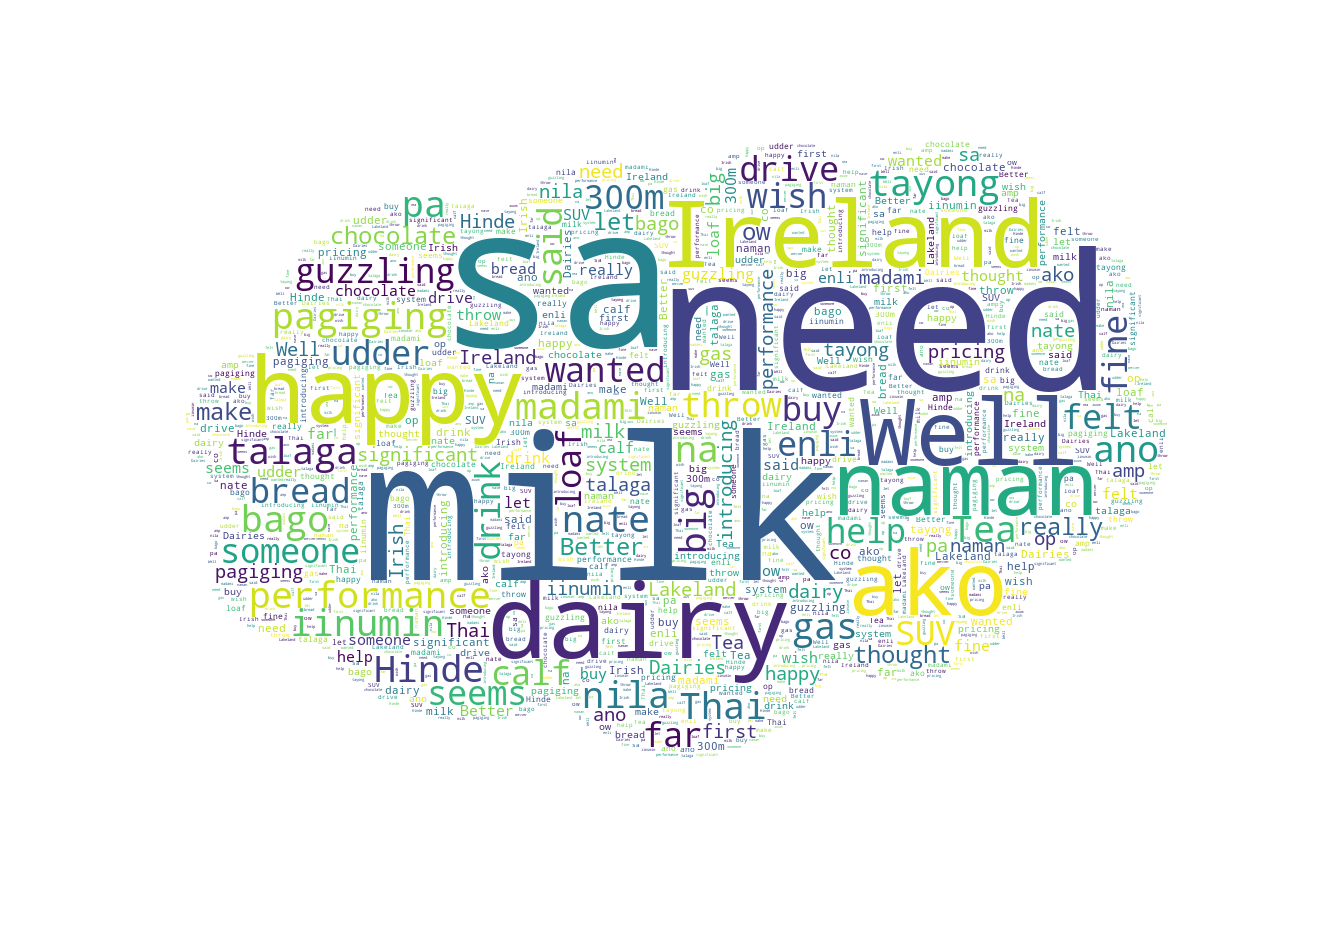

In [ ]:
create_wordcloud(df_formatted[df_formatted["sentiment"]=="positive"]["formatted_text"].values, "positive_tweets")

### N-gram analyzer

In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]


In [ ]:
get_top_n_gram(df_formatted[df_formatted["sentiment"]=="positive"]["formatted_text"],(3,3),20)

[('farming milk production', 226),
 ('production like retweet', 222),
 ('milk production like', 220),
 ('dairy goat farming', 216),
 ('goat farming milk', 216),
 ('good morning cruelty', 166),
 ('morning cruelty free', 166),
 ('cruelty free day', 166),
 ('free day vegan', 166),
 ('day vegan environment', 166),
 ('mweworksug pastoralists says', 111),
 ('pastoralists says current', 111),
 ('says current rains', 111),
 ('current rains expected', 111),
 ('rains expected improve', 111),
 ('expected improve foliage', 111),
 ('improve foliage pasture', 111),
 ('starvation cuteanimals rspca', 95),
 ('vegan environment rspb', 71),
 ('environment rspb cuteanimals', 71)]

In [ ]:
get_top_n_gram(df_formatted[df_formatted["sentiment"]=="neutral"]["formatted_text"],(3,3),20)

[('agricultural input price', 205),
 ('input price index', 205),
 ('price index shows', 205),
 ('index shows fertiliser', 205),
 ('shows fertiliser prices', 205),
 ('fertiliser prices 149', 205),
 ('prices 149 year', 205),
 ('149 year march', 205),
 ('year march 2022', 205),
 ('march 2022 csoir', 204),
 ('humans survive milk', 131),
 ('survive milk steak', 131),
 ('milk steak happens', 131),
 ('steak happens countries', 131),
 ('happens countries supply', 131),
 ('countries supply fruit', 131),
 ('supply fruit vegetables', 131),
 ('fruit vegetables impacted', 130),
 ('cows squalid filthy', 91),
 ('squalid filthy conditions', 91)]

In [ ]:
get_top_n_gram(df_formatted[df_formatted["sentiment"]=="negative"]["formatted_text"],(3,3),20)

[('projected milk price', 82),
 ('milk price summer', 82),
 ('price summer autumn', 82),
 ('summer autumn compensate', 82),
 ('autumn compensate inflationary', 82),
 ('compensate inflationary pressures', 82),
 ('northern ireland faces', 70),
 ('ireland faces loss', 70),
 ('faces loss million', 70),
 ('loss million sheep', 70),
 ('million sheep cattle', 70),
 ('sheep cattle meet', 70),
 ('cattle meet climate', 70),
 ('meet climate targets', 70),
 ('climate targets follows', 70),
 ('targets follows fires', 70),
 ('follows fires meat', 70),
 ('fires meat proces', 70),
 ('baby formula shortage', 52),
 ('turns ireland dairy', 35)]